# Setting Up Your Environment

This notebook contains some guidelines to prepare programming environments for the upcomming labs. During our labs we will mostly work in Jupyter Notebook. 

(We are using Python 3)

### Step 1: Install Jupyter Notebook

I suggest you to install free [Anaconda](https://docs.anaconda.com/anaconda/install/) Python distribution which already includes all necessary Python packages and modules - NumPy, SciPy, Matplotlib and **NetworkX**. Simply download appropriate installer for your OS and follow the proposed steps.

<!-- -*- coding: utf-8 -*- -->
# Introduction to NetworkX
*Credits: This tutorial was created by the NetworkX Developers and modified by Laura Arditti.*

This guide can help you start working with NetworkX.

## Graph Types

NetworkX provides data structures and methods for storing graphs. The choice of graph class depends on the structure of the graph you want to represent.


### Graph—Undirected graphs
Base class for undirected graphs.
A Graph stores nodes and edges with optional data, or attributes.
Graphs hold undirected edges. Self loops are allowed but multiple (parallel) edges are not.
Edges are represented as links between nodes with optional key/value attributes.

#### Creating a Graph

Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any hashable object e.g., a text string, an image, another
Graph, etc.

## Nodes

The graph `G` can be grown in several ways.  You can add one node
at a time,

In [2]:
G.add_node(1)
print(G.nodes)

[1]


or you can add the nodes from any container (a list, dict, set or the nodes from another graph).

In [3]:
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)
print(G.nodes)

[1, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 0, 4, 5, 6, 7, 8, 9]


# What to use as nodes and edges
Any Python hashable object (except `None`) can represent a node, even another Graph.

In [4]:
G.add_node(H)
print(G.nodes)

[1, 2, 3, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x00000124B21DAA60>]


The graph `G` now contains `H` as a node. This flexibility is very powerful as
it allows graphs of graphs, graphs of files, and much more.

Similarily, an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

Nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings.

## Edges

`G` can also be grown by adding one edge at a time,

In [5]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
print(G.edges)

[(1, 2), (2, 3)]


by adding a list of edges,

In [6]:
G.add_edges_from([(1, 2, {'weight':1.1}), (1, 3,{'weight':1.5})])
print(G.edges)

[(1, 2), (1, 3), (2, 3)]


or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.
For example, an instance of ebunch containing all the edges of the graph H is obtained with `H.edges`:

In [7]:
G.add_edges_from(H.edges)
print(G.edges)

[(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


If some edges connect nodes not yet in the graph, the nodes are added automatically. There are no errors when adding nodes or edges that already exist.


For example, after removing all nodes and edges,

In [8]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [9]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
print("Nodes:", G.nodes)
print("Edges:", G.edges)

Nodes: [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
Edges: [(1, 2), (1, 3), (3, 'm')]


At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [10]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 8
Number of edges: 3


# Examining elements of a graph


We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure.

They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('attribute')`.


If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [11]:
print("List of nodes:", list(G.nodes))
print("List of edges:", list(G.edges))
print("List of neighbors of node 1:", list(G.adj[1]))  # or list(G.neighbors(1))
print("Degree of node 1:", G.degree[1])  # the number of edges incident to 1

List of nodes: [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
List of edges: [(1, 2), (1, 3), (3, 'm')]
List of neighbors of node 1: [2, 3]
Degree of node 1: 2


One can specify to report the edges and degree from a subset of all nodes
using an *nbunch*. An *nbunch* is any of: None (meaning all nodes), a node,
or an iterable container of nodes that is not itself a node in the graph.

In [12]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

# Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [16]:
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1, 3)
list(G.nodes)

[1, 3, 'spam']


# Accessing edges and neighbors

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

In [17]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print("Neighborhood of node 1:", G[1])
# same as 
print(G.adj[1])
print("Edge attributes of edge between 1 and 2:", G[1][2])
# same as 
print(G.edges[(1, 2)])

Neighborhood of node 1: {2: {'color': 'yellow'}}
{2: {'color': 'yellow'}}
Edge attributes of edge between 1 and 2: {'color': 'yellow'}
{'color': 'yellow'}


You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [18]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[(1, 2)]['color'] = "red"
print("Edges with attributes:", dict(G.edges))

Edges with attributes: {(1, 2): {'color': 'red'}, (1, 3): {'color': 'blue'}}


Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [19]:
[x for x in G.adjacency()]

[(1, {2: {'color': 'red'}, 3: {'color': 'blue'}}),
 (2, {1: {'color': 'red'}}),
 (3, {1: {'color': 'blue'}})]

In [21]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [22]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`or by direct
manipulation of the attribute dictionary named
`G.edges` for a graph `G`.


## Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [23]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[(3, 4)]['weight'] = 4.2
print("All edges with their attributes:", dict(G.edges))

All edges with their attributes: {(1, 2): {'color': 'blue', 'weight': 4.7}, (1, 3): {'color': 'blue'}, (2, 3): {'weight': 8}, (3, 4): {'color': 'red', 'weight': 4.2}, (4, 5): {'color': 'red'}}


The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

# Directed graphs

The `DiGraph` class provides additional properties specific to
directed edges, e.g.,
`DiGraph.out_edges()`, `DiGraph.in_degree()`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [24]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
# argument weight specifies which edge attribute to be used 
# as weight in computing the degree
print("Out degree of node 1:",DG.out_degree(1, weight='weight')) 
print("Sum of in-degree and out-degree of node 1:", DG.degree(1, weight='weight'))
print("Successors of node 1:", list(DG.successors(1)))
print("All neighbors of node 1:", list(DG.neighbors(1)))

Out degree of node 1: 0.5
Sum of in-degree and out-degree of node 1: 1.25
Successors of node 1: [2]
All neighbors of node 1: [2]


Some algorithms work only for directed graphs and others are not well
defined for directed graphs. If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [25]:
H = nx.Graph(DG)  # convert G to undirected graph

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.

In some cases results are well defined,
e.g., `MultiGraph.degree()`.  

In [26]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print("All nodes with their degree:", dict(MG.degree(weight='weight')))

All nodes with their degree: {1: 1.25, 2: 1.75, 3: 0.5}


Otherwise you should convert to a standard graph in a way that makes the measurement
well defined.

In [27]:
# Example: to compute the shortest path in a Multigraph, we construct a standard graph where 
# multiple links are replaced by a single link with the sum of all weights
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   complement(G)            - graph complement
   create_empty_copy(G)     - return an empty copy of the same graph class
   to_undirected(G) - return an undirected representation of G
   to_directed(G)   - return a directed representation of G
   ```

1. Using a call to one of the classic small graphs, e.g.,

In [28]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

3. Using a (constructive) generator for a classic graph, e.g.,

In [29]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

4. Using a stochastic graph generator, e.g.,

In [30]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

5. Reading a graph stored in a file using common graph formats,
   such as edge lists, adjacency lists, GML and others.

In [31]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

For details on graph formats see section Reading and writing graphs of Networkx documentation
and for graph generator functions see section Graph generators.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib is included.  

First import Matplotlib’s plot interface 

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

As an example, draw `G` using one of

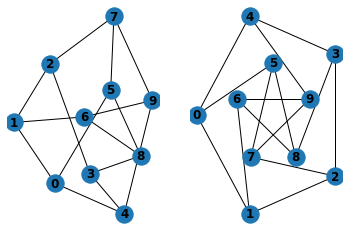

In [33]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

You can specify drawing options separately using an `options` dictionary.
You can find additional options via `draw_networkx()` and
layouts via `layout`. For example, the shell layout `draw_shell()` places different gropus of nodes in concentric circles ("shells").

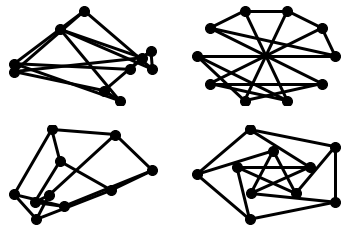

In [34]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

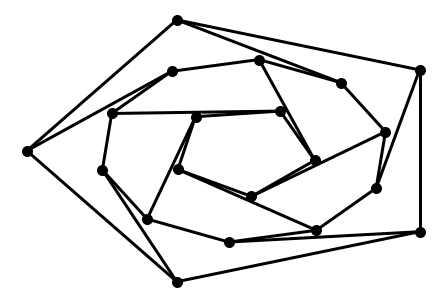

In [35]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

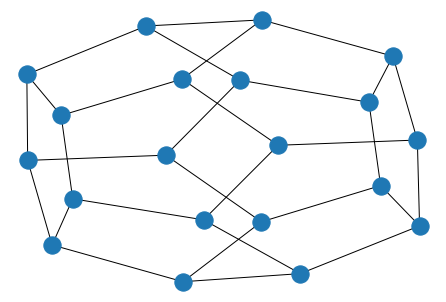

In [36]:
nx.draw(G)
plt.savefig("path.png")

writes to the file `path.png` in the local directory.

See Drawing for additional details.

# Algorithms
NetworkX offers the implementation of a lot of network-related algorithms, which allow performing complex graph analysis in a simple way.
As an overview we present the following functions contained in the modules `networkx.algorithms.components` and `networkx.algorithms.cycles`.

## Strong connectivity
A directed graph is strongly connected if and only if every vertex in the graph is reachable from every other vertex.
`networkx.algorithms.components.is_strongly_connected` test directed graph for strong connectivity.

Is strongly connected: False


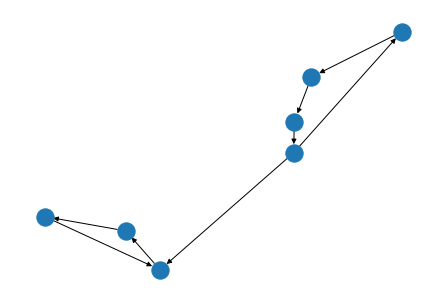

In [37]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 1)])
DG.add_edges_from([(4,5), (5,6), (6,7), (7,4)])
DG.add_edge(4,1)
nx.draw(DG)
print("Is strongly connected:", nx.algorithms.components.is_strongly_connected(DG))

You can further analyze connectivity of a directed graph by computing the number of strongly connected components and the condensation graph, which is the graph with each of the strongly connected components contracted into a single node.

Number of connected components: 2


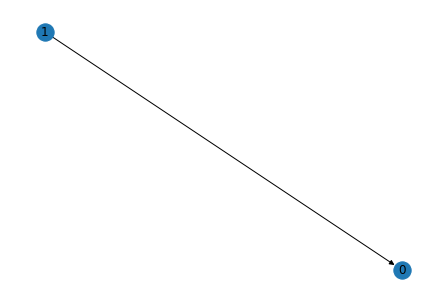

In [38]:
print("Number of connected components:", nx.algorithms.components.number_strongly_connected_components(DG))
CG = nx.algorithms.components.condensation(DG)
nx.draw(CG, with_labels=True)

CG is the condensation graph of DG. The node labels are integers corresponding to the index of the component in the list of strongly connected components of DG. 

CG has a graph attribute named ‘mapping’ with a dictionary mapping the original nodes of DG to the nodes in CG to which they belong. Each node in CG also has a node attribute ‘members’ with the set of original nodes in DG that form the strongly connected component that the node in CG represents.

In [39]:
mapping = CG.graph['mapping']
print(mapping)

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}


In [40]:
dict(CG.nodes)

{0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}

**Note**: all previous functions related to strong connectivity can only be applied to directed graphs. Counterparts are provided for undirected graphs.

## Sinks
In networkxX, an attracting component in a directed graph DG is a strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component. This is equivalent to requiring that the strongly connected component is a trapping set.
Attracting components in DG consitute sinks of its condensation graph CG.

`networkx.algorithms.components.number_attracting_components` returns the number of attracting components in DG.


In [41]:
print("Number of attracting components:", nx.algorithms.components.number_attracting_components(DG))

Number of attracting components: 1


`networkx.algorithms.components.attracting_components` generates the attracting components of DG.
You can directly list nodes of DG belonging to each attracting component:

In [42]:
for c in nx.algorithms.components.attracting_components(DG):
    print(c)

{1, 2, 3}


or you can obtain the subgraphs of DG induced on each attracting component and visualize them:

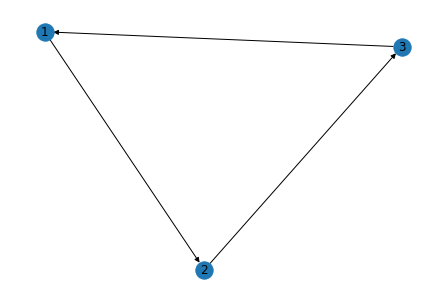

In [43]:
components = list(DG.subgraph(c).copy() for c in nx.algorithms.components.attracting_components(DG))
for c in components:
    nx.draw(c, with_labels=True)

## Cycles
A simple cycle is a closed path where no node appears twice. Two elementary circuits are considered distinct if they are not cyclic permutations of each other.

NetworkX provides cycle finding algorithms, that can be exploited to compute the periodicity of nodes and graphs.
For example, `networkx.algorithms.cycles.simple_cycles` find simple cycles of a directed graph

In [44]:
cycles = list(nx.simple_cycles(DG))
for cycle in cycles:
    print("Cycle:", cycle, "Lenght:", len(cycle))

Cycle: [4, 5, 6, 7] Lenght: 4
Cycle: [1, 2, 3] Lenght: 3


### Period of a node
The period of a node is the Greatest Common Divisior of all cycles containing such node.

#### Exercise
Try to compute the period of each node in DG. 

**Hint**: exploit `networkx.algorithms.cycles.simple_cycles` and `math.gcd()`, which computes the GCD of two given numbers.
Remember that you can compute the GCD of a list of numbers sequentially:

In [45]:
from math import gcd

numbers = [9,6,21]
GCD = numbers[0] # First initialize GCD with the first number of the list
for n in numbers:
    GCD = gcd(GCD,n)
GCD

3

In [46]:
# TO DO
cycles = list(nx.simple_cycles(DG))
cyc_len = {n:[] for n in DG.nodes}
for cycle in cycles:
    l_cycle = len(cycle)
    for node in cycle:
        cyc_len[node].append(l_cycle)

for node, lens in cyc_len.items():
    GCD = lens[0] # First initialize GCD with the first number of the list
    for n in lens:
        GCD = gcd(GCD,n)
    
    print(f"node {node} period {GCD}")

node 1 period 3
node 2 period 3
node 3 period 3
node 4 period 4
node 5 period 4
node 6 period 4
node 7 period 4


#### Exercise
Consider the following directed graph.

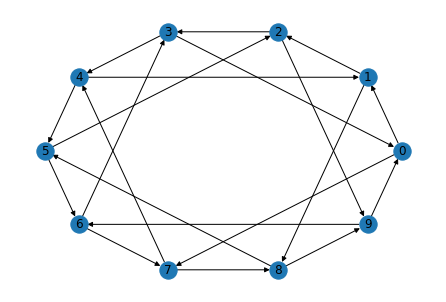

In [57]:
DG = nx.DiGraph()
n_nodes = 10
nx.add_cycle(DG, range(n_nodes))
for n in range(n_nodes):
    other = n+3
    if other>=n_nodes:
        other-=n_nodes
    DG.add_edge(other,n)
nx.draw_circular(DG, with_labels=True)


We can check that DG is strongly connected and not aperiodic

In [58]:
print("Is strongly connected:",nx.is_strongly_connected(DG))
print("Is aperiodic:",nx.is_aperiodic(DG))

Is strongly connected: True
Is aperiodic: False


In view of these facts, compute the period of the graph DG.

**Hint:** Exploit the results from previous exercise and the fact that all nodes of a strongly connected graph have the same period.

In [61]:
# TO DO

cycles = list(nx.simple_cycles(DG))
cyc_len = {n:[] for n in DG.nodes}
for cycle in cycles:
    l_cycle = len(cycle)
    for node in cycle:
        cyc_len[node].append(l_cycle)

for node, lens in cyc_len.items():
    GCD = lens[0] # First initialize GCD with the first number of the list
    for n in lens:
        GCD = gcd(GCD,n)
    
    print(f"graph period {GCD}")
    break

graph period 2


## Spanning subgraphs
A spanning subgraph is a subgraph that contains all the vertices of the original graph. Of particular interest are spanning trees, i.e., spanning subgraphs that are trees.

We can generate all the spanning subgraphs of a given graph as follows.

Number of subgraphs: 64


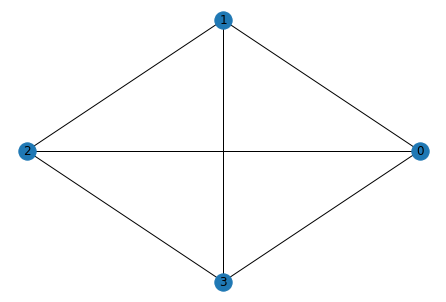

In [62]:
# As an example, construct a graph
G = nx.Graph()
nx.add_cycle(G, range(4))
G.add_edges_from([(0,2), (1,3)]) 
nx.draw_circular(G, with_labels=True)

# Define a function for computing the power set of a given set
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Use 'powerset' to compute all subgraphs of G

subgraphs = list()
for edge_set in powerset(G.edges):
    H = G.edge_subgraph(edge_set)
    subgraphs.append(H)
print("Number of subgraphs:", len(subgraphs))

#### Exercise 
Compute all spanning subtrees of G. 

**Hint:** use the previous code and exploit the following characterization of trees:
> An undirected graph T is a tree if and only if T is connected and the number of edges of T is one less that the number of its nodes.

In [73]:
# TO DO

for edge_set in powerset(G.edges):
    H = G.edge_subgraph(edge_set)
    if H.number_of_edges == 1 - H.number_of_nodes() and  nx.is_connected(H):
        nx.draw(H)

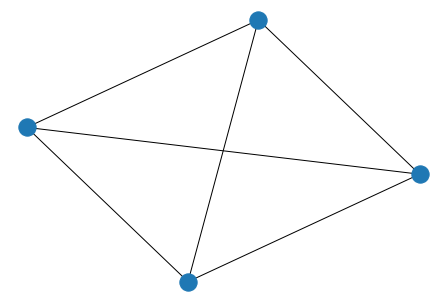

In [74]:
nx.draw(G)